In [4]:
from netCDF4 import Dataset
import numpy as np

In [5]:
multi_beam = '/home/mschwehr/TestData/ZTopo.grd'


In [39]:
fh = Dataset(multi_beam, mode='r')

In [40]:
fh.variables


OrderedDict([(u'x', <type 'netCDF4._netCDF4.Variable'>
              float64 x(x)
                  long_name: Longitude
                  actual_range: [-122.09461817 -122.09289585]
              unlimited dimensions: 
              current shape = (3079,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'y', <type 'netCDF4._netCDF4.Variable'>
              float64 y(y)
                  long_name: Latitude
                  actual_range: [ 36.70097857  36.70225751]
              unlimited dimensions: 
              current shape = (2839,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'z', <type 'netCDF4._netCDF4.Variable'>
              float32 z(y, x)
                  long_name: Topography (m)
                  _FillValue: nan
                  actual_range: [-1841.56799316 -1836.09680176]
              unlimited dimensions: 
              current shape = (2839, 3079)
              filling on)])

In [78]:
lons = fh.variables['x'][:]
lats = fh.variables['y'][:]
depth = fh.variables['z'][:]



TypeError: only integer arrays with one element can be converted to an index

In [44]:
depth

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = nan)

In [46]:
fh.close()



In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [20]:
lon_0 = lons.mean()
lat_0 = lats.mean()


In [21]:
lon_0


-122.093757009

In [26]:
m = Basemap(width=3079,height=2839,
            resolution='l',projection='merc',lat_0=lat_0,lon_0=lon_0)

In [27]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

In [34]:
lon
lat

array([[ 36.70097857,  36.70097857,  36.70097857, ...,  36.70097857,
         36.70097857,  36.70097857],
       [ 36.70097902,  36.70097902,  36.70097902, ...,  36.70097902,
         36.70097902,  36.70097902],
       [ 36.70097947,  36.70097947,  36.70097947, ...,  36.70097947,
         36.70097947,  36.70097947],
       ..., 
       [ 36.70225661,  36.70225661,  36.70225661, ...,  36.70225661,
         36.70225661,  36.70225661],
       [ 36.70225706,  36.70225706,  36.70225706, ...,  36.70225706,
         36.70225706,  36.70225706],
       [ 36.70225751,  36.70225751,  36.70225751, ...,  36.70225751,
         36.70225751,  36.70225751]])

In [63]:
depth = -1*depth
depth

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = nan)

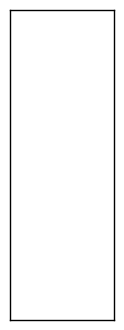

In [35]:
cs = m.pcolor(xi,yi,np.squeeze(depth))
plt.show()

In [29]:
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

{-300.0: ([<matplotlib.lines.Line2D at 0x7f45cdea13d0>],
  [<matplotlib.text.Text at 0x7f46624a69d0>]),
 -290.0: ([<matplotlib.lines.Line2D at 0x7f466257dc50>],
  [<matplotlib.text.Text at 0x7f46624a6e90>]),
 -280.0: ([<matplotlib.lines.Line2D at 0x7f46625892d0>],
  [<matplotlib.text.Text at 0x7f46624b3310>]),
 -270.0: ([<matplotlib.lines.Line2D at 0x7f4662589910>],
  [<matplotlib.text.Text at 0x7f46624b3750>]),
 -260.0: ([<matplotlib.lines.Line2D at 0x7f4662589f50>],
  [<matplotlib.text.Text at 0x7f46624b3b90>]),
 -250.0: ([<matplotlib.lines.Line2D at 0x7f46625965d0>],
  [<matplotlib.text.Text at 0x7f46624b3fd0>]),
 -240.0: ([<matplotlib.lines.Line2D at 0x7f4662596c10>],
  [<matplotlib.text.Text at 0x7f46624c0450>]),
 -230.0: ([<matplotlib.lines.Line2D at 0x7f4662522290>],
  [<matplotlib.text.Text at 0x7f46624c0890>]),
 -220.0: ([<matplotlib.lines.Line2D at 0x7f46625228d0>],
  [<matplotlib.text.Text at 0x7f46624c0cd0>]),
 -210.0: ([<matplotlib.lines.Line2D at 0x7f4662522f10>],
  [<mat

In [30]:
m.drawcoastlines()
m.drawstates()
m.drawcountries()

In [31]:
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('meters')

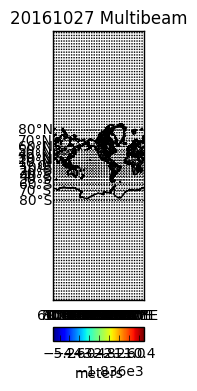

In [32]:
plt.title('20161027 Multibeam')

plt.show()

In [47]:
ncfile = Dataset(multi_beam, 'r')

In [51]:
print("Attributes:")
print(ncfile.ncattrs())
print("\nVariables:")
print(ncfile.variables)

Attributes:
[u'Conventions', u'title', u'history', u'description', u'GMT_version']

Variables:
OrderedDict([(u'x', <type 'netCDF4._netCDF4.Variable'>
float64 x(x)
    long_name: Longitude
    actual_range: [-122.09461817 -122.09289585]
unlimited dimensions: 
current shape = (3079,)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'y', <type 'netCDF4._netCDF4.Variable'>
float64 y(y)
    long_name: Latitude
    actual_range: [ 36.70097857  36.70225751]
unlimited dimensions: 
current shape = (2839,)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'z', <type 'netCDF4._netCDF4.Variable'>
float32 z(y, x)
    long_name: Topography (m)
    _FillValue: nan
    actual_range: [-1841.56799316 -1836.09680176]
unlimited dimensions: 
current shape = (2839, 3079)
filling on)])


In [52]:
%matplotlib inline


In [56]:
x = ncfile.variables['x']
y = ncfile.variables['y']

In [59]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

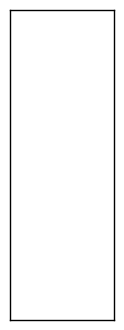

In [71]:
cs = m.contourf(xi,yi,depth)

In [72]:
depth

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = nan)

In [68]:
fh.variables['x'].shape

(3079,)

In [69]:
fh.variables['y'].shape


(2839,)

In [70]:
fh.variables['z'].shape

(2839, 3079)

In [73]:
print fh.data_model

NETCDF4


In [74]:
print len(lon)

2839


In [75]:
print len(depth)

2839


In [76]:
print depth


[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


In [77]:
print fh.z


AttributeError: NetCDF: Attribute not found